In [1]:
import pandas as pd
import seaborn as sns

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MultiLabelBinarizer

# Load data

df = pd.read_csv("../csv/books_task.csv")

# Data Cleaning
# Convert publishedDate to datetime
df['publishedDate'] = pd.to_datetime(df['publishedDate'], errors='coerce')

# Handle missing values
df['description'].fillna('', inplace=True)

# Feature Engineering
# Extract year and month from publishedDate
df['publishedYear'] = df['publishedDate'].dt.year
df['publishedMonth'] = df['publishedDate'].dt.month

# Convert authors, categories, and title to string
def authors_clean(x):
    if pd.isna(x):
        return ""
    x = x.replace("[","")
    x = x.replace("]","")
    return ', '.join(x.split(","))

df["authors"] = df["authors"].apply(authors_clean)
#df['authors'] = df['authors'].apply(lambda x: ', '.join(x.replace("[","").replace("]","").split(",")))
#df['categories'] = df['categories'].apply(lambda x: ', '.join(x))
df['Title'] = df['Title'].astype(str)

# Feature Engineering for 'Title'
# Using TF-IDF to extract features from title
tfidf_title = TfidfVectorizer(stop_words='english', max_features=100)
title_features = tfidf_title.fit_transform(df['Title']).toarray()
title_feature_names = tfidf_title.get_feature_names_out()

# Convert to DataFrame and concatenate with original DataFrame
title_df = pd.DataFrame(title_features, columns=['title_' + name for name in title_feature_names])
df = pd.concat([df, title_df], axis=1)

# Feature Engineering for 'categories'
# Using TF-IDF to extract features from categories
# Feature Engineering for 'categories'
# Convert categories to one-hot encoded features
mlb = MultiLabelBinarizer()
categories_features = mlb.fit_transform(df['categories'].apply(lambda x: x.split(', ')))
categories_feature_names = mlb.classes_

# Convert to DataFrame and concatenate with original DataFrame
categories_df = pd.DataFrame(categories_features, columns=['category_' + name for name in categories_feature_names])
#df = df.drop(["categories"],axis=1)
df = pd.concat([df, categories_df], axis=1)


# Feature Engineering for 'description'
# Using TF-IDF to extract features from description
tfidf_description = TfidfVectorizer(stop_words='english', max_features=100)
description_features = tfidf_description.fit_transform(df['description']).toarray()
description_feature_names = tfidf_description.get_feature_names_out()

# Convert to DataFrame and concatenate with original DataFrame
description_df = pd.DataFrame(description_features, columns=['desc_' + name for name in description_feature_names])
df = pd.concat([df, description_df], axis=1)

# Feature Engineering for 'authors'
# Using TF-IDF to extract features from authors
tfidf_authors = TfidfVectorizer(stop_words='english', max_features=100)
authors_features = tfidf_authors.fit_transform(df['authors']).toarray()
authors_feature_names = tfidf_authors.get_feature_names_out()

# Convert to DataFrame and concatenate with original DataFrame
authors_df = pd.DataFrame(authors_features, columns=['author_' + name for name in authors_feature_names])
df = pd.concat([df, authors_df], axis=1)

# Feature Engineering for 'publisher'
# Using TF-IDF to extract features from publisher
tfidf_publisher = TfidfVectorizer(stop_words='english', max_features=100)
publisher_features = tfidf_publisher.fit_transform(df['publisher']).toarray()
publisher_feature_names = tfidf_publisher.get_feature_names_out()

# Convert to DataFrame and concatenate with original DataFrame
publisher_df = pd.DataFrame(publisher_features, columns=['publisher_' + name for name in publisher_feature_names])
df = pd.concat([df, publisher_df], axis=1)

# Regression
# Prepare features and target variable
X = df.drop(['Title', 'description', 'authors', 'publisher', 'publishedDate', 'categories', 'Impact'], axis=1)
y = df['Impact']

X = X.fillna(0)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


/tmp/ipykernel_5014/1576985958.py:17: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Mean Squared Error: 3705.617638760829


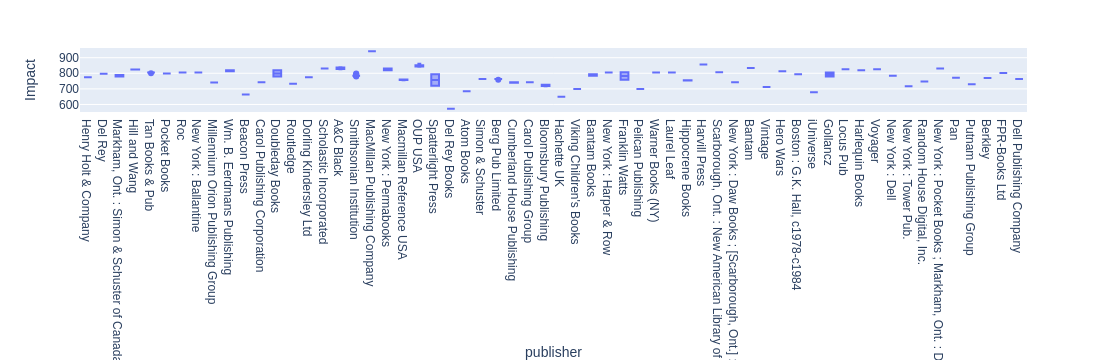

In [28]:
import plotly.express as px
fig = px.box(df[df["categories"] == "['Science fiction']"], x="publisher", y="Impact")
fig.show()

In [29]:
fig.write_html("sci-fi.html")

In [31]:
high_imp = df[df["Impact"] >= 950]

In [69]:
high_imp

,_c0,Title,description,authors,publisher,publishedDate,categories,Impact,publishedYear,publishedMonth,...,publisher_uk,publisher_univ,publisher_university,publisher_usa,publisher_vintage,publisher_wiley,publisher_wm,publisher_york,publisher_young,publisher_zondervan
1161,1669,The Gregg Reference Manual,The Gregg Reference Manual is intended for any...,'William Sabin',McGraw-Hill Education,NaT,['Language Arts & Disciplines'],957.000603,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2406,3375,Magruder's American government,Hailed as a stellar educational resource since...,'William A. McClenaghan',Prentice Hall,NaT,['Education'],958.005769,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2599,3641,Robert The Bruce The Price Of The Kings Peace,This trilogy tells the story of Robert the Bru...,'Nigel Tranter',Coronet,NaT,['True Crime'],954.075493,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2973,4183,Into the Wild (Warriors),Join the legion of fans who have made Erin Hun...,'Erin Hunter',HarperCollins,NaT,['Juvenile Fiction'],953.013111,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3324,4671,Angelique: The Marquise of the Angels,Angelique is consumed by the desire for reveng...,"'Anne Golon', 'Sergeanne Golon', 'Rita Barisse'",G K Hall & Company,NaT,['Fiction'],978.503951,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129949,195270,Fred Claire: My 30 Years in Dodger Blue,Fred Claire takes you through his 30 years wit...,'Fred Claire',Simon and Schuster,NaT,['Biography & Autobiography'],951.714429,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130139,195578,The Calvin and Hobbes Tenth Anniversary Book,"The creator of ""Calvin and Hobbes"" discusses t...",'Bill Watterson',Andrews McMeel Publishing,NaT,['Humor'],956.098653,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133895,201634,Raquela: a Woman of Israel,A National Jewish Book Award–winning biography...,'Ruth Gruber',Open Road Media,NaT,['Biography & Autobiography'],958.046553,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135077,203934,The Four Laws of Debt Free Prosperity,,"'Blaine Harris', 'Charles A. Coonradt'",Financial Wellness Group,1996-01-01,['Business & Economics'],960.533110,1996.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
high_imp.shape

(149, 515)

In [51]:
high_imp["categories"].value_counts()

categories
['Juvenile Fiction']               36
['Biography & Autobiography']      20
['Fiction']                        17
['Religion']                       16
['Juvenile Nonfiction']             8
['History']                         6
['Education']                       5
['Cooking']                         3
['Body, Mind & Spirit']             3
['Comics & Graphic Novels']         3
['Art']                             3
['Humor']                           3
['Sports & Recreation']             3
['Family & Relationships']          2
['Business & Economics']            2
['Foreign Language Study']          2
['Self-Help']                       2
['Crafts & Hobbies']                2
['Reference']                       2
['Health & Fitness']                1
['Animals']                         1
['Photography']                     1
['Language Arts & Disciplines']     1
['American literature']             1
['Literary Criticism']              1
['Games & Activities']              1
[

In [52]:
high_imp["authors"].value_counts()

authors
'Bill Watterson'                     4
'Brian Jacques'                      3
                                     3
'Leonard Ravenhill'                  3
'L. M. Montgomery'                   2
                                    ..
'Joyce Meyer'                        1
'Lawrence S. Ritter'                 1
'Kris Vallotton',  'Bill Johnson'    1
"Kevin O'Hara"                       1
'A. W. Tozer'                        1
Name: count, Length: 129, dtype: int64

In [53]:
high_imp["publisher"].value_counts()

publisher
Simon and Schuster                 11
McGraw-Hill Education               5
Andrews McMeel Publishing           5
Open Road Media                     5
Coronet                             4
                                   ..
Penguin                             1
Farrar, Straus and Giroux (BYR)     1
Albert Whitman & Company            1
FaithWords                          1
ISD LLC                             1
Name: count, Length: 97, dtype: int64

In [57]:
df["publisher"].value_counts()[0:50]

publisher
Tan Books & Pub                      3635
Simon and Schuster                   3600
Smithsonian Institution              3216
Penguin                              2788
Wm. B. Eerdmans Publishing           2563
Routledge                            2371
John Wiley & Sons                    1984
Harper Collins                       1959
Cambridge University Press           1478
A&C Black                            1355
Macmillan                            1215
OUP USA                              1187
Berg Pub Limited                     1169
Courier Corporation                  1116
iUniverse                            1057
Bloomsbury Publishing                1031
Open Road Media                       983
Vintage                               976
Springer Science & Business Media     885
Houghton Mifflin Harcourt             878
Oxford University Press               759
Random House                          751
Hachette UK                           724
Princeton University Pre

In [42]:
def description_trilogy(x):
    if "trilogy" in x.lower():
        return True
    else:
        return False

In [43]:
df["trilogy_desc"] = df["description"].apply(description_trilogy)

<Axes: >

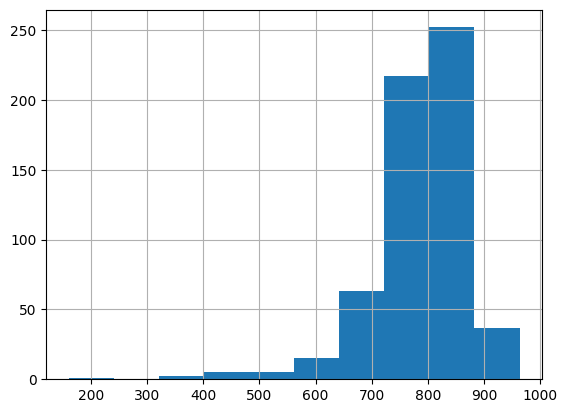

In [46]:
df[df["trilogy_desc"]]["Impact"].hist()

<Axes: >

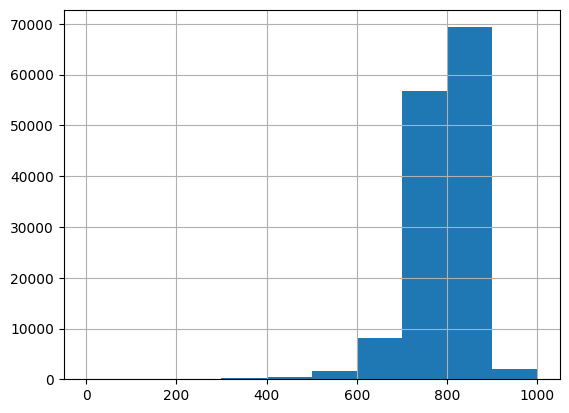

In [47]:
df["Impact"].hist()

In [66]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/tanmay/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from nltk.tokenize import word_tokenize
import gensim.downloader as api
import nltk

def infer_sentence_embeddings(model, new_sentences):
    """
    Infer embeddings for new sentences using a pre-trained Doc2Vec model.

    Args:
    - model (Doc2Vec): Pre-trained Doc2Vec model.
    - new_sentences (list of str): List of new sentences to infer embeddings for.

    Returns:
    - embeddings (list of numpy arrays): List of inferred embeddings for the new sentences.
    """

    embeddings = []
    for sentence in new_sentences:
        tokenized_sentence = word_tokenize(sentence.lower())
        inferred_vector = model.infer_vector(tokenized_sentence)
        embeddings.append(inferred_vector)

    return embeddings

# Download pre-trained Doc2Vec model
model = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded
